# Project: Investigate a Dataset (The Movie Dataset)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set to be used is the movie dataset, the data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue.


> I will be performing Data wrangling to clean up the data, exploratory analysis to get more insights on the data and while answering some research questions that will basically tell more about the variables and the relationship between theses variables and how they affect each other.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section of the report,I will load in the data, check for cleanliness, and then trim and clean the movie dataset for analysis.
### General Properties

In [2]:
#loading datasets
df=pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



### Data Cleaning

In [3]:
#Getting info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the above, we can see that dataset has a total of 21 columns, 10866 rows.
There are missing values in columns; homepage, tagline, keywords, production_companies
We can decide to drop these columns, because
<li> They don't necessarily contribute to what we need to find out in the dataset </li>
<li> Replacing data the with mean or mode might not work in this case

In [4]:
#checking for duplicates
df[df['id'].duplicated() == True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [5]:
df.drop_duplicates(keep=False, inplace=True)

In [6]:
#To check that all duplicates have been dropped
df[df['id'].duplicated()==True]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


We will drop some columns that might not be needed in answering the research questions as shown below

In [7]:
df.drop(['homepage', 'tagline','keywords','production_companies','imdb_id','release_date','overview','revenue','budget','runtime'], axis=1, inplace=True)

In [8]:
df.columns

Index(['id', 'popularity', 'original_title', 'cast', 'director', 'genres',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [9]:
df.describe()

,id,popularity,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10864.000000,10864.000000,10864.000000,10864.000000,10864.000000,1.086400e+04,1.086400e+04
mean,66068.571797,0.646450,217.409518,5.975101,2001.321060,1.754875e+07,5.137364e+07
std,92138.047887,1.000277,575.670200,0.935134,12.813579,3.430890e+07,1.446442e+08
min,5.000000,0.000065,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10595.250000,0.207566,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20659.000000,0.383829,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75614.500000,0.713925,146.000000,6.600000,2011.000000,2.082397e+07,3.370925e+07
max,417859.000000,32.985763,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [10]:
df.dtypes

id                  int64
popularity        float64
original_title     object
cast               object
director           object
genres             object
vote_count          int64
vote_average      float64
release_year        int64
budget_adj        float64
revenue_adj       float64
dtype: object

##### Some columns have incorrect data types as can be seen above, we will change the following columns to the correct dtypes
<li> release year: from int to datetime</li>

In [11]:
df['release_year'] = pd.to_datetime(df.release_year,format='%Y')

In [12]:
#confirming the datatypes
df.dtypes

id                         int64
popularity               float64
original_title            object
cast                      object
director                  object
genres                    object
vote_count                 int64
vote_average             float64
release_year      datetime64[ns]
budget_adj               float64
revenue_adj              float64
dtype: object

In [13]:
df.describe()

,id,popularity,vote_count,vote_average,budget_adj,revenue_adj
count,10864.000000,10864.000000,10864.000000,10864.000000,1.086400e+04,1.086400e+04
mean,66068.571797,0.646450,217.409518,5.975101,1.754875e+07,5.137364e+07
std,92138.047887,1.000277,575.670200,0.935134,3.430890e+07,1.446442e+08
min,5.000000,0.000065,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,10595.250000,0.207566,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,20659.000000,0.383829,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,75614.500000,0.713925,146.000000,6.600000,2.082397e+07,3.370925e+07
max,417859.000000,32.985763,9767.000000,9.200000,4.250000e+08,2.827124e+09


In [14]:
df.genres.head()
df.genres.tail()

10861               Documentary
10862    Action|Adventure|Drama
10863            Mystery|Comedy
10864             Action|Comedy
10865                    Horror
Name: genres, dtype: object

In [15]:
#Separating the genre column for better analysis
df[['class1', 'class2', 'class3','class4','class5']] = df['genres'].str.split('|', expand=True)

In [16]:
df.head(10)

,id,popularity,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,class1,class2,class3,class4,class5
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015-01-01,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015-01-01,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015-01-01,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None
5,281957,9.110700,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,3929,7.2,2015-01-01,1.241999e+08,4.903142e+08,Western,Drama,Adventure,Thriller,None
6,87101,8.654359,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,Science Fiction|Action|Thriller|Adventure,2598,5.8,2015-01-01,1.425999e+08,4.053551e+08,Science Fiction,Action,Thriller,Adventure,None
7,286217,7.667400,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,Drama|Adventure|Science Fiction,4572,7.6,2015-01-01,9.935996e+07,5.477497e+08,Drama,Adventure,Science Fiction,None,None
8,211672,7.404165,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,2893,6.5,2015-01-01,6.807997e+07,1.064192e+09,Family,Animation,Adventure,Comedy,None
9,150540,6.326804,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,Comedy|Animation|Family,3935,8.0,2015-01-01,1.609999e+08,7.854116e+08,Comedy,Animation,Family,None,None


In [17]:
df['genres'].value_counts()

Drama                                             712
Comedy                                            712
Documentary                                       312
Drama|Romance                                     289
Comedy|Drama                                      280
Comedy|Romance                                    268
Horror|Thriller                                   259
Horror                                            253
Comedy|Drama|Romance                              222
Drama|Thriller                                    138
Comedy|Family                                     102
Action|Thriller                                   101
Thriller                                           93
Drama|Comedy                                       92
Animation|Family                                   90
Crime|Drama|Thriller                               81
Crime|Drama                                        74
Comedy|Horror                                      72
Drama|Comedy|Romance        

##### We could see that Drama is contained in the genres with high count

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: which genres are most popular from year to year

> I will be creating visualisation and statistical inferences that will help answer this question through variable comparison and data visualisation

In [18]:
df.class1.value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               379
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: class1, dtype: int64

In [19]:
df.class2.value_counts()

Drama              1617
Comedy              990
Thriller            961
Romance             704
Adventure           626
Action              544
Horror              489
Crime               449
Family              448
Science Fiction     330
Fantasy             304
Mystery             238
Animation           207
Music               183
History             159
Documentary          77
Foreign              62
War                  53
Western              43
TV Movie             29
Name: class2, dtype: int64

In [20]:
df.class3.value_counts()

Thriller           886
Romance            583
Drama              546
Family             401
Science Fiction    401
Comedy             388
Crime              350
Mystery            289
Action             197
Fantasy            190
Horror             186
Adventure          183
War                 95
History             88
Animation           80
Music               79
Foreign             69
Western             39
TV Movie            19
Documentary          8
Name: class3, dtype: int64

In [21]:
df.class4.value_counts()

Thriller           448
Science Fiction    216
Romance            194
Family             178
Crime              152
Drama              124
Mystery            121
Fantasy            109
Comedy              81
Adventure           62
Action              42
War                 41
History             39
Foreign             37
Horror              36
Music               32
Western             31
TV Movie            27
Animation            6
Documentary          3
Name: class4, dtype: int64

In [22]:
df.class5.value_counts()

Thriller           120
Science Fiction     67
Family              60
Romance             45
Fantasy             41
Mystery             37
Crime               23
War                 22
Drama               19
Comedy              15
Music               14
Adventure           14
TV Movie            14
Foreign             11
Horror              11
Western             10
Action              10
History              4
Animation            3
Name: class5, dtype: int64

###### From the above, we can notice that the Drama genre seems to be the most popular from year to year, we will confirm this using some visuals.

In [37]:
#plotting the genre classes with the release year
#Since it is a repitition, we put them in a function
def plot_class(df,class_col,release_year):
    df1=df.groupby([class_col,release_year]).size()
    df1=df1.unstack()
    ax = df1.plot(kind='bar',figsize=(16,16), label='Plot of {} and {}'.format(class_col,release_year))
    ax.set_xlabel(class_col)
    ax.set_ylabel('count of release_year')

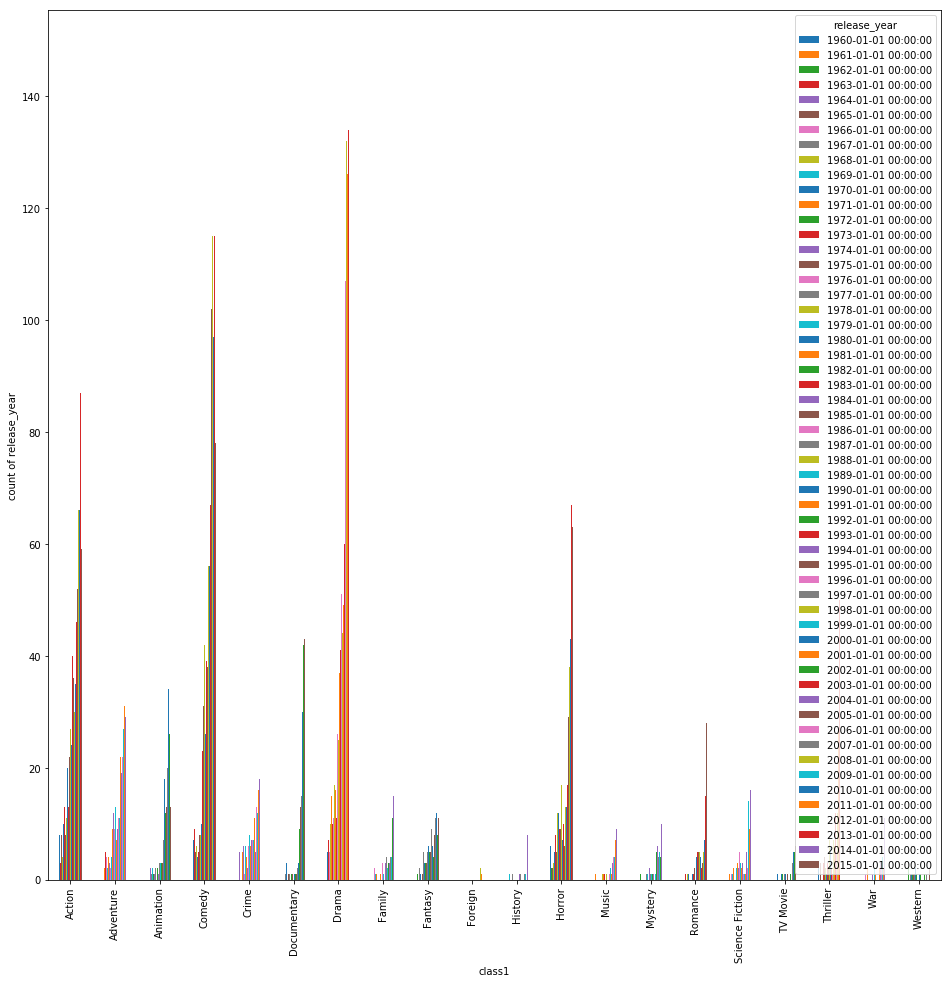

In [39]:
#From the plot, we can see that from year to year, the Drama genre keeps increasing for the class1
plot_class(df,'class1','release_year')

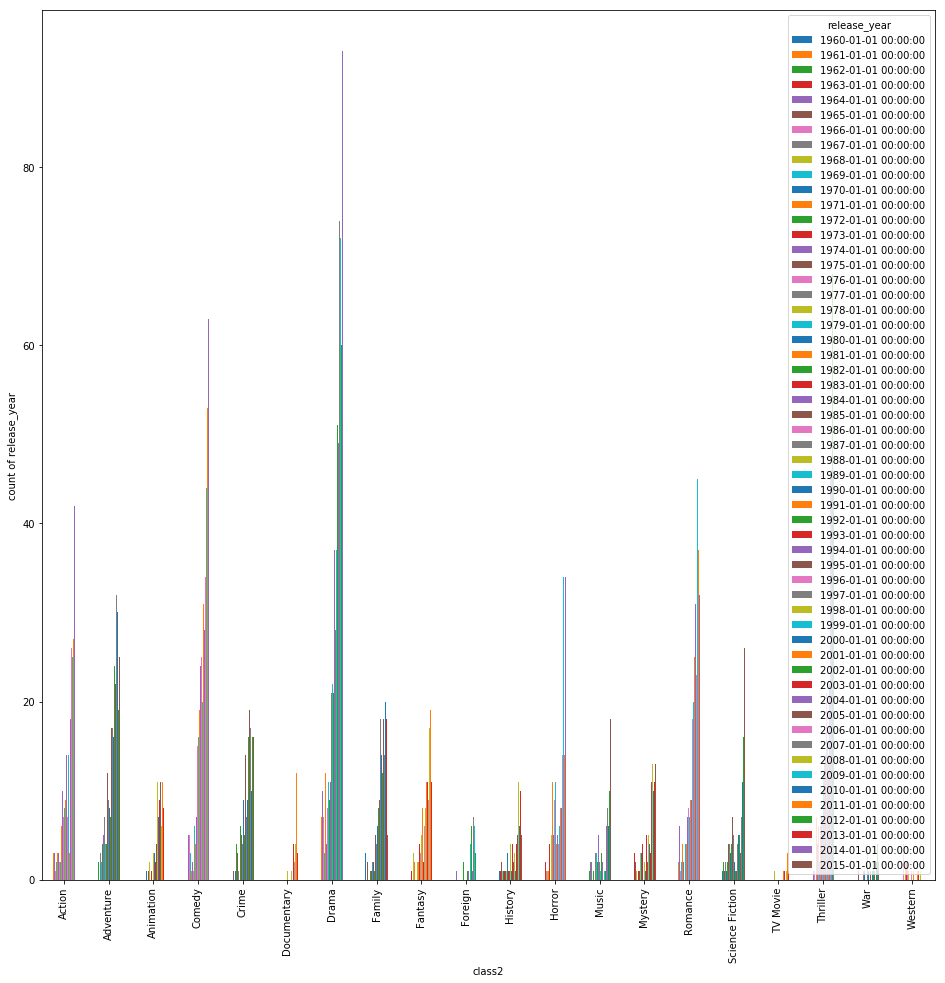

In [40]:
plot_class(df,'class2','release_year')

###### We can also see that the Drama genre still keeps getting popular

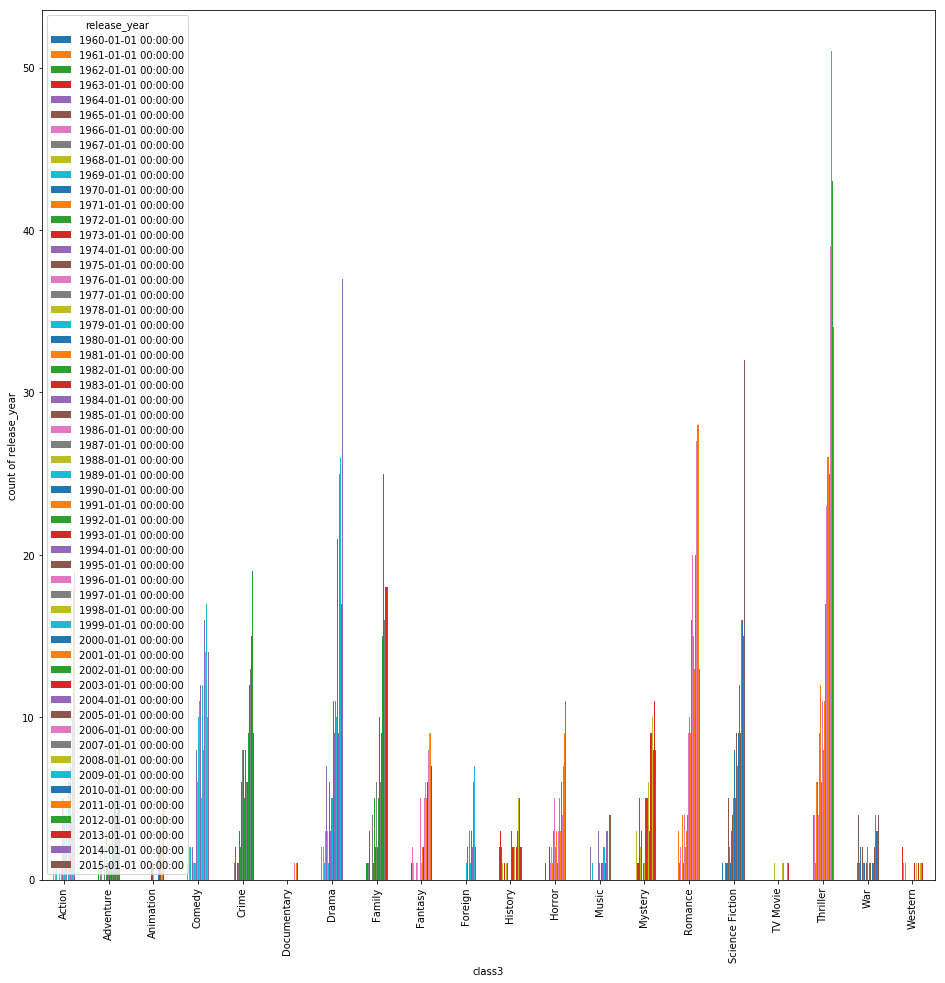

In [41]:
plot_class(df,'class3','release_year')

###### The drama and Thriller class, becomes more popular from year to year

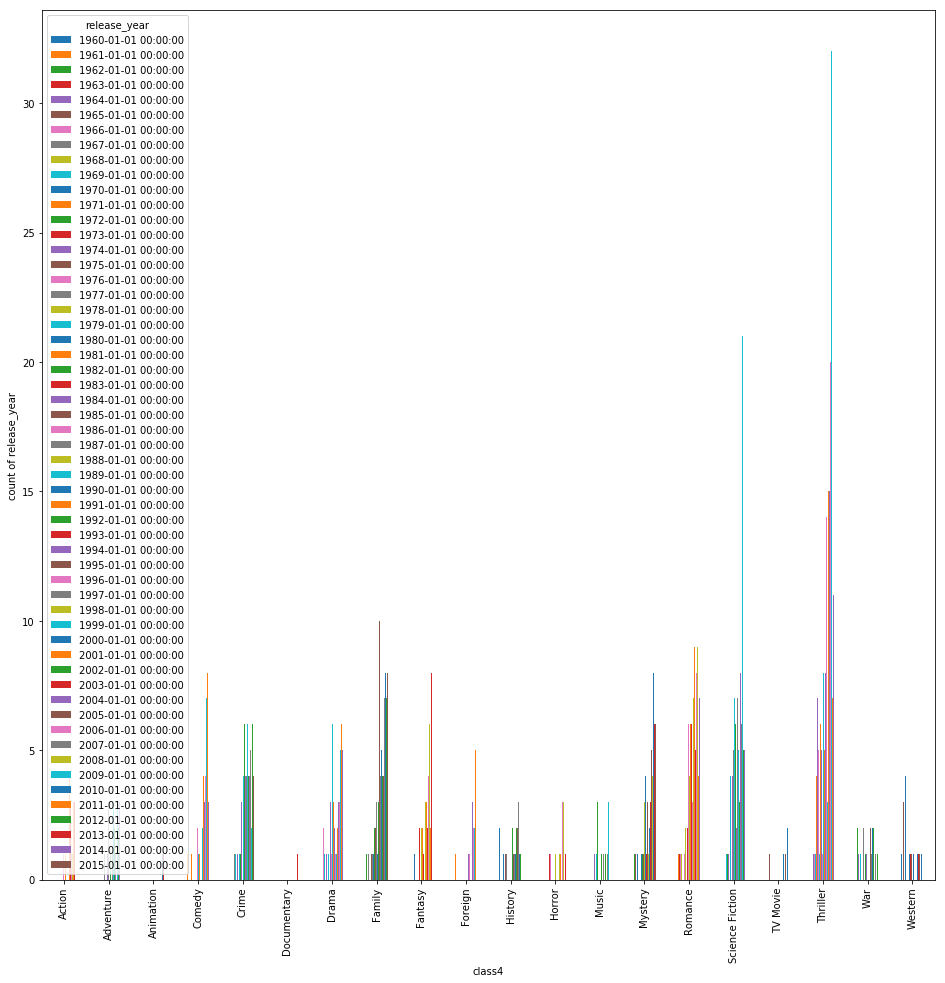

In [42]:
plot_class(df,'class4','release_year')

###### The thriller class keeps getting popular for the claas 4

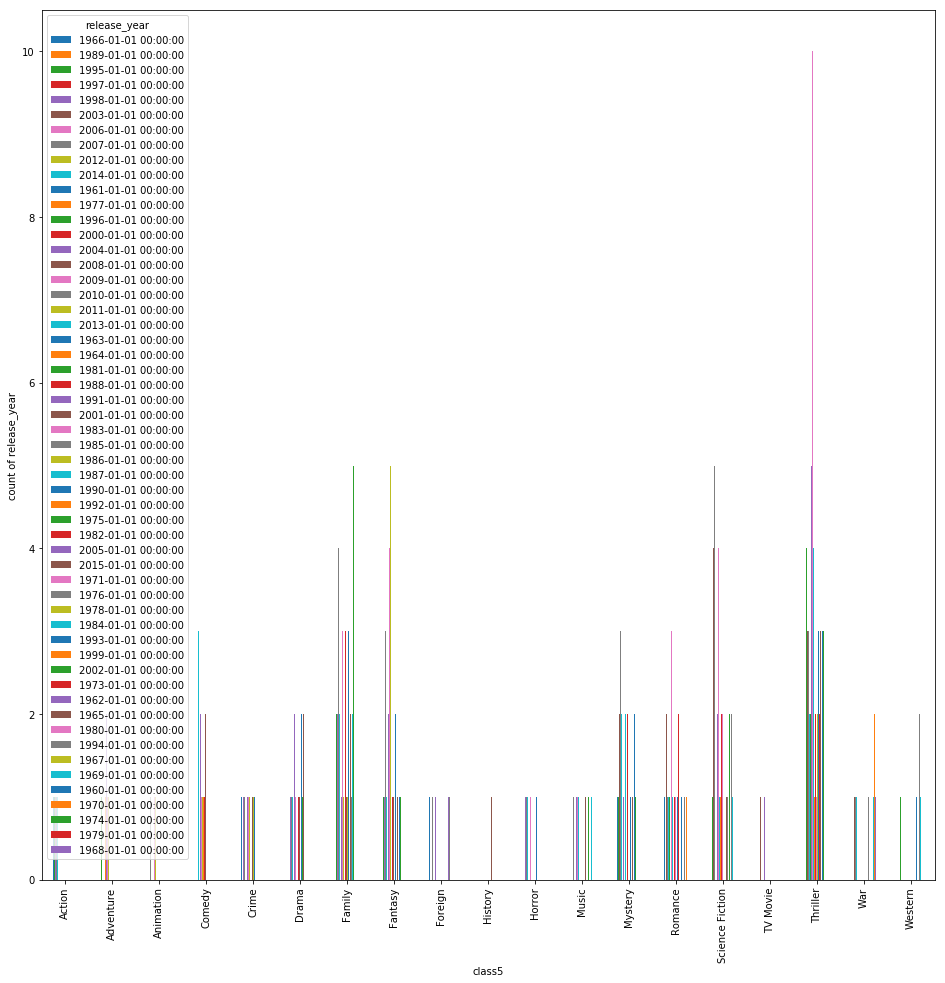

In [43]:
plot_class(df,'class5','release_year')

#### From the above analysis, we can see that the 'Drama' is the most popular from year to year, followed up by the thriller genre, varying from Ids and class

### Research Question 2 : The properties associated with movies with high revenues

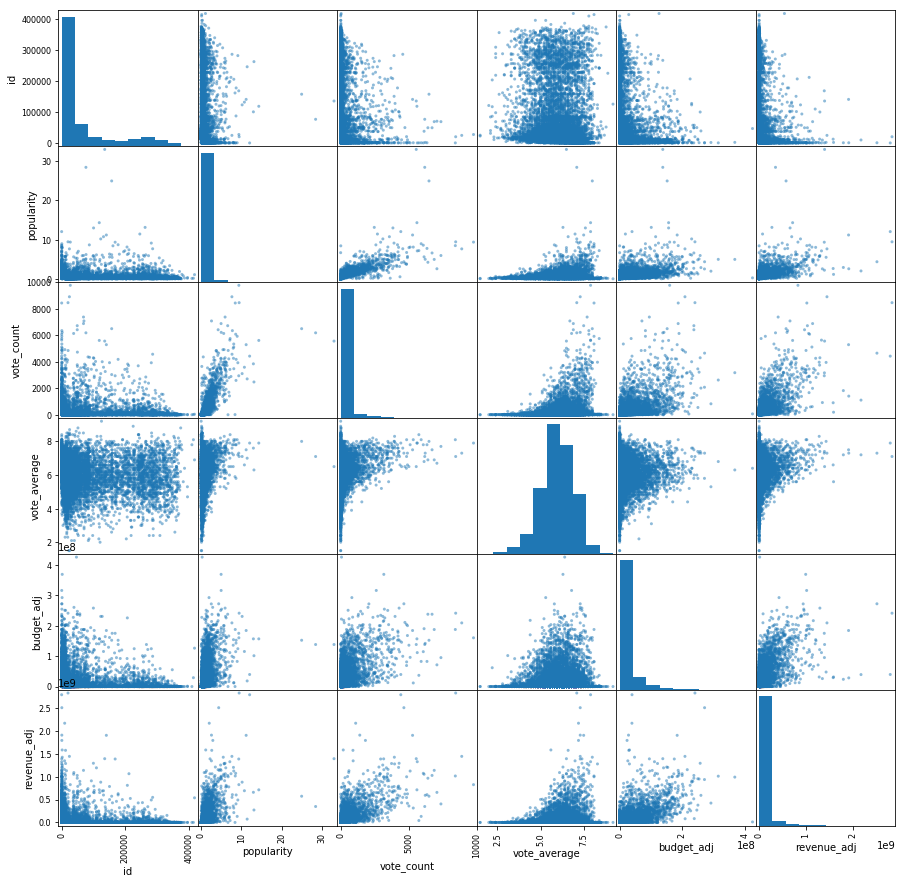

In [22]:
#This will help us view the individual column in correlation with other columns in the dataframe
pd.plotting.scatter_matrix(df,figsize=(15,15));

##### Investigating the dataset even further to get more insights from the data, I have decided to select popular genres and its properties and save to a new dataframe, that way we can easily distingusish differences and know features that are associated with popular genres

> Some of the popular genres are:
<li> Drama </li>
<li> Thriller </li>
<li> Family </li>

> While some of the unpopular are:

<li> Documentary </li>
<li> History </li>
<li> War </li>

> I will compare these two and find out outstanding properties between them


In [23]:
df_popular = df[df["genres"].str.contains('Drama', na=False)]

In [24]:
df_popular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4759 entries, 5 to 10862
Data columns (total 16 columns):
id                4759 non-null int64
popularity        4759 non-null float64
original_title    4759 non-null object
cast              4751 non-null object
director          4753 non-null object
genres            4759 non-null object
vote_count        4759 non-null int64
vote_average      4759 non-null float64
release_year      4759 non-null datetime64[ns]
budget_adj        4759 non-null float64
revenue_adj       4759 non-null float64
class1            4759 non-null object
class2            4047 non-null object
class3            2609 non-null object
class4            1077 non-null object
class5            283 non-null object
dtypes: datetime64[ns](1), float64(4), int64(2), object(9)
memory usage: 632.1+ KB


In [25]:
df_popular.describe()

,id,popularity,vote_count,vote_average,budget_adj,revenue_adj
count,4759.000000,4759.000000,4759.000000,4759.000000,4.759000e+03,4.759000e+03
mean,61198.525951,0.591494,182.559781,6.165791,1.485035e+07,4.042543e+07
std,88471.518747,0.799652,478.040902,0.811826,2.720290e+07,1.139574e+08
min,13.000000,0.000065,10.000000,2.400000,0.000000e+00,0.000000e+00
25%,10116.000000,0.222586,17.000000,5.700000,0.000000e+00,0.000000e+00
50%,18602.000000,0.388875,37.000000,6.200000,0.000000e+00,0.000000e+00
75%,63524.000000,0.673067,133.000000,6.700000,1.984093e+07,2.866816e+07
max,395560.000000,24.949134,8432.000000,8.800000,2.716921e+08,2.506406e+09


In [26]:
df_remainder = df[df.apply(lambda x: x.values.tolist() not in df_popular.values.tolist(), axis=1)]

In [27]:
df_remainder.head()

,id,popularity,original_title,cast,director,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,class1,class2,class3,class4,class5
0,135397,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015-01-01,1.379999e+08,1.392446e+09,Action,Adventure,Science Fiction,Thriller,None
1,76341,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015-01-01,1.379999e+08,3.481613e+08,Action,Adventure,Science Fiction,Thriller,None
2,262500,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,Adventure|Science Fiction|Thriller,2480,6.3,2015-01-01,1.012000e+08,2.716190e+08,Adventure,Science Fiction,Thriller,None,None
3,140607,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015-01-01,1.839999e+08,1.902723e+09,Action,Adventure,Science Fiction,Fantasy,None
4,168259,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Action|Crime|Thriller,2947,7.3,2015-01-01,1.747999e+08,1.385749e+09,Action,Crime,Thriller,None,None


In [28]:
df_remainder.describe()

,id,popularity,vote_count,vote_average,budget_adj,revenue_adj
count,6105.000000,6105.000000,6105.000000,6105.000000,6.105000e+03,6.105000e+03
mean,69864.894185,0.689290,244.575758,5.826454,1.965222e+07,5.990805e+07
std,94731.676071,1.130491,640.276401,0.996034,3.883179e+07,1.641487e+08
min,5.000000,0.000620,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,11011.000000,0.197331,17.000000,5.200000,0.000000e+00,0.000000e+00
50%,22572.000000,0.380058,39.000000,5.900000,0.000000e+00,0.000000e+00
75%,81716.000000,0.760193,161.000000,6.500000,2.233127e+07,3.934018e+07
max,417859.000000,32.985763,9767.000000,9.200000,4.250000e+08,2.827124e+09


In [30]:
df_thriller=df[df["genres"].str.contains('Thriller', na=False)]

In [31]:
df_thriller.describe()

,id,popularity,vote_count,vote_average,budget_adj,revenue_adj
count,2906.000000,2906.000000,2906.000000,2906.000000,2.906000e+03,2.906000e+03
mean,62134.651755,0.741613,255.534412,5.750929,2.067976e+07,5.530479e+07
std,89600.897838,1.231755,613.353544,0.897221,3.518417e+07,1.453501e+08
min,6.000000,0.001983,10.000000,2.200000,0.000000e+00,0.000000e+00
25%,9792.250000,0.259004,19.000000,5.200000,0.000000e+00,0.000000e+00
50%,17788.500000,0.444301,50.000000,5.800000,3.249968e+06,0.000000e+00
75%,70165.500000,0.822819,191.750000,6.400000,2.759999e+07,4.331536e+07
max,395560.000000,32.985763,9767.000000,8.800000,4.250000e+08,2.506406e+09


In [32]:
df_romance = df[df["genres"].str.contains('Romance', na=False)]

In [33]:
df_romance.describe()

,id,popularity,vote_count,vote_average,budget_adj,revenue_adj
count,1712.000000,1712.000000,1712.000000,1712.000000,1.712000e+03,1.712000e+03
mean,50329.014603,0.592082,166.070678,6.042874,1.565922e+07,4.820022e+07
std,78286.481458,0.622098,353.502274,0.757095,2.604488e+07,1.260566e+08
min,13.000000,0.001983,10.000000,2.500000,0.000000e+00,0.000000e+00
25%,10112.500000,0.220270,18.000000,5.600000,0.000000e+00,0.000000e+00
50%,16282.500000,0.403937,41.500000,6.100000,1.615394e+01,1.394620e+04
75%,45543.750000,0.715546,144.250000,6.600000,2.302222e+07,3.821721e+07
max,369058.000000,6.715966,4856.000000,8.400000,2.716921e+08,2.506406e+09


In [34]:
df_documentary = df[df["genres"].str.contains('Documentary', na=False)]

In [35]:
df_documentary.describe()

,id,popularity,vote_count,vote_average,budget_adj,revenue_adj
count,520.000000,520.000000,520.000000,520.000000,5.200000e+02,5.200000e+02
mean,126915.646154,0.181432,35.105769,6.908462,6.232226e+05,2.258210e+06
std,113354.082726,0.161292,45.115036,0.759148,3.595786e+06,1.197258e+07
min,21.000000,0.001117,10.000000,4.100000,0.000000e+00,0.000000e+00
25%,23760.750000,0.066578,13.000000,6.500000,0.000000e+00,0.000000e+00
50%,83187.500000,0.142240,19.000000,7.000000,0.000000e+00,0.000000e+00
75%,238714.250000,0.250674,36.000000,7.400000,0.000000e+00,0.000000e+00
max,376823.000000,1.005772,363.000000,9.200000,6.098403e+07,1.375112e+08


In [36]:
df_family = df[df["genres"].str.contains('Family', na=False)]

In [37]:
df_family.describe()

,id,popularity,vote_count,vote_average,budget_adj,revenue_adj
count,1231.000000,1231.000000,1231.000000,1231.000000,1.231000e+03,1.231000e+03
mean,50493.664500,0.786668,272.320877,5.997563,2.692389e+07,8.773671e+07
std,76519.320106,0.975562,623.899204,0.858394,4.565797e+07,2.027853e+08
min,12.000000,0.001662,10.000000,2.100000,0.000000e+00,0.000000e+00
25%,11520.500000,0.245491,20.000000,5.400000,0.000000e+00,0.000000e+00
50%,18937.000000,0.470249,49.000000,6.000000,0.000000e+00,0.000000e+00
75%,48239.000000,0.938633,189.500000,6.600000,3.907972e+07,7.028098e+07
max,417859.000000,8.691294,4851.000000,8.000000,2.600000e+08,1.791694e+09


##### From the above comparison we can see that, popular genres have the following properties:
<li> Higher Budget
    Higher vote_count and vot_average
    Higher popularity
    and ofcourse higher revenue </li>
    
> As opposed to the unpopular genre

In [44]:
#Let's find more on correlation
df['popularity'].corr(df['vote_count'])

0.80082900970023463

In [46]:
df['popularity'].corr(df['revenue_adj'])

0.6090871726115813

<a id='conclusions'></a>
## Conclusions

> In conclusion, having gone through the data analysis steps from cleaning,analysing, exploratory analysis to drawing insights, I can satisfactorily say that;

Concerning visualisations done on the movie dataset;

There is a positive correlation between popularity and vote_count, the more the vote count, the more popular the movie.
Also a movie that has a budget has more popularity and is more has more revenue returns.
This can be also seen from the correlation score found using df[variable1].corr(df[variable2]) as shown above.

Investigating this data set was really interesting as it is relatable to what individuals would easily or rather go for.

Also I realised that genres like war, history were not as popular, this could be because people do not love to be involved in things that could cause them to cry as well.

###### Limitations
> Some of the limitations however could be that data is not updated as a more recent data could confirm most of the conclusions made.
> Also we could see that the data set did not indicate attitude as to location, this could have helped us decern if the insights gotten is perculiar to certain countries or specifics locations or if it could be easily generalised as normal to all human.

In [47]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0